# Code from Yi Li, MQE UCLA

In [1]:
import wooldridge as woo
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pandas as pd
import scipy
from BorutaShap import BorutaShap
import statsmodels.formula.api as smf
import itertools
from RegscorePy import mallow
import statsmodels.api as sm
from scipy.stats import bootstrap
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import statsmodels.stats.api as sms
import matplotlib.image as mpimg
from statsmodels.graphics.regressionplots import plot_ceres_residuals
import patsy as pt
import statsmodels.stats.outliers_influence as smo
from matplotlib.ticker import ScalarFormatter
import statsmodels.regression.linear_model as rg
import statsmodels.stats.diagnostic as dg
from simple_colors import *

In [2]:
bjp = pd.read_csv("Beijing_housing_prices.csv")
bjp.describe()

,totalPrice,Lng,Lat,DOM,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,ladderRatio,elevator,subway,communityAverage
count,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,372.422921,116.417428,39.950728,29.802247,29.505618,78.899933,1.982022,1.146067,0.995506,1.143820,0.584270,1998.433708,0.380393,0.525843,0.543820,62085.779775
std,165.222025,0.118151,0.094909,46.881838,64.694174,29.870253,0.719510,0.496623,0.094809,0.370036,0.493402,9.515433,0.184251,0.499894,0.498637,21916.801037
min,80.300000,116.117019,39.676703,1.000000,0.000000,23.800000,1.000000,0.000000,0.000000,0.000000,0.000000,1954.000000,0.038000,0.000000,0.000000,28916.000000
25%,245.000000,116.346630,39.895822,1.000000,2.000000,57.600000,1.000000,1.000000,1.000000,1.000000,0.000000,1992.000000,0.250000,0.000000,0.000000,45099.000000
50%,348.000000,116.418802,39.934189,7.000000,13.000000,70.370000,2.000000,1.000000,1.000000,1.000000,1.000000,2000.000000,0.333000,1.000000,1.000000,57680.000000
75%,460.000000,116.477581,40.006303,41.000000,34.000000,95.180000,2.000000,1.000000,1.000000,1.000000,1.000000,2006.000000,0.500000,1.000000,1.000000,73675.000000
max,855.000000,116.695201,40.227012,380.000000,922.000000,214.430000,4.000000,3.000000,2.000000,3.000000,1.000000,2015.000000,2.000000,1.000000,1.000000,133064.000000


In [3]:
bjp["totalPrice"] = np.log(bjp["totalPrice"])
bjp.rename(columns = {'totalPrice':'ltotalPrice'}, inplace = True)
bjp["communityAverage"] = bjp["communityAverage"] / 10000
bjp.describe()

,ltotalPrice,Lng,Lat,DOM,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,ladderRatio,elevator,subway,communityAverage
count,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,5.819607,116.417428,39.950728,29.802247,29.505618,78.899933,1.982022,1.146067,0.995506,1.143820,0.584270,1998.433708,0.380393,0.525843,0.543820,6.208578
std,0.458887,0.118151,0.094909,46.881838,64.694174,29.870253,0.719510,0.496623,0.094809,0.370036,0.493402,9.515433,0.184251,0.499894,0.498637,2.191680
min,4.385770,116.117019,39.676703,1.000000,0.000000,23.800000,1.000000,0.000000,0.000000,0.000000,0.000000,1954.000000,0.038000,0.000000,0.000000,2.891600
25%,5.501258,116.346630,39.895822,1.000000,2.000000,57.600000,1.000000,1.000000,1.000000,1.000000,0.000000,1992.000000,0.250000,0.000000,0.000000,4.509900
50%,5.852202,116.418802,39.934189,7.000000,13.000000,70.370000,2.000000,1.000000,1.000000,1.000000,1.000000,2000.000000,0.333000,1.000000,1.000000,5.768000
75%,6.131226,116.477581,40.006303,41.000000,34.000000,95.180000,2.000000,1.000000,1.000000,1.000000,1.000000,2006.000000,0.500000,1.000000,1.000000,7.367500
max,6.751101,116.695201,40.227012,380.000000,922.000000,214.430000,4.000000,3.000000,2.000000,3.000000,1.000000,2015.000000,2.000000,1.000000,1.000000,13.306400


### Using the Boruta Algorithm, we  identified our top 7 predictors: 'communityAverage', 'square', 'followers', 'livingRoom', 'DOM', 'Lat', 'constructionTime'. From the regression result, we find that two indicators are significant: elevator, subway. 

  0%|          | 0/50 [00:00<?, ?it/s]

7 attributes confirmed important: ['communityAverage', 'square', 'followers', 'livingRoom', 'DOM', 'Lat', 'constructionTime']
5 attributes confirmed unimportant: ['ladderRatio', 'Lng', 'drawingRoom', 'kitchen', 'bathRoom']
0 tentative attributes remains: []


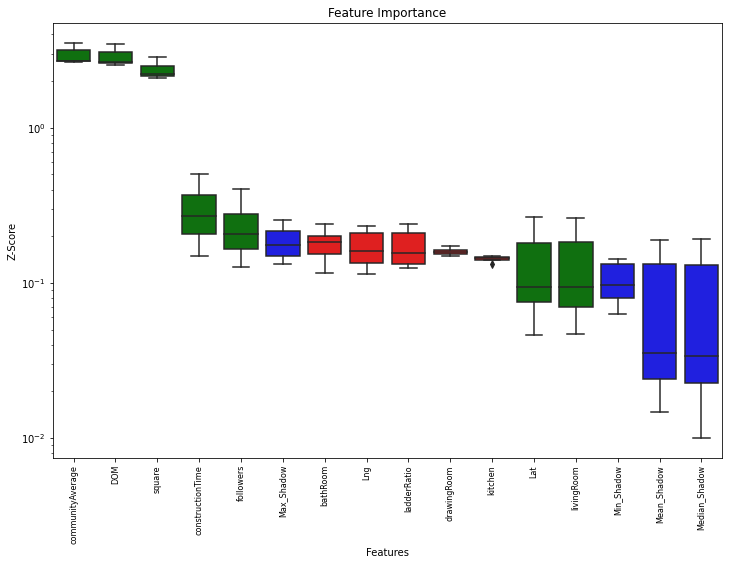

In [4]:
boruta_data = bjp[["ltotalPrice","Lng","Lat","DOM","followers","square","livingRoom","drawingRoom","kitchen","bathRoom","constructionTime","ladderRatio","communityAverage"]].copy()
x = boruta_data.iloc[:, 1:]
y = boruta_data["ltotalPrice"]
Feature_Selector = BorutaShap(importance_measure = 'shap', classification = False)
Feature_Selector.fit(X = x, y = y, n_trials = 50, random_state = 0)
Feature_Selector.plot(which_features = 'all')

In [5]:
reg_ind = smf.ols(formula = 'ltotalPrice ~ buildingType + elevator + subway', data = bjp)
results_ind = reg_ind.fit()
results_ind.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ltotalPrice   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     12.84
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           4.66e-08
Time:                        13:59:04   Log-Likelihood:                -265.66
No. Observations:                 445   AIC:                             539.3
Df Residuals:                     441   BIC:                             555.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.5452      0.081     68.743      0.000       5.387       5.704
buildingType     0.0881      0.070      1.261      0.208      -0.049       0.225
elevator         0.2626      0.069      3.824      0.000       0.128       0.398
subway           0.1560      0.042      3.682      0.000       0.073       0.239
==============================================================================
Omnibus:                        7.867   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.950
Skew:                          -0.305   Prob(JB):                       0.0188
Kurtosis:                       2.761   Cond. No.                         8.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Based on our findings above, our preferred choice is predictors of 'constructionTime', 'livingRoom', 'square', 'communityAverage', 'Lat',"buildingType", "elevator", "subway"

### The histograms, q-q plots, correlation plots, and density plots are shown below. Every variable seems not to be normally distributed except ltotalPrice and Lat. There is some correlation between ltotalPrice and predictors. However, there is also some correlation between predictors which needs to be tested later.

In [6]:
data = bjp[["ltotalPrice",'constructionTime', 'livingRoom', 'square', 'communityAverage', 'Lat',"buildingType", "elevator", "subway"]].copy()
data.isnull().any()

ltotalPrice         False
constructionTime    False
livingRoom          False
square              False
communityAverage    False
Lat                 False
buildingType        False
elevator            False
subway              False
dtype: bool

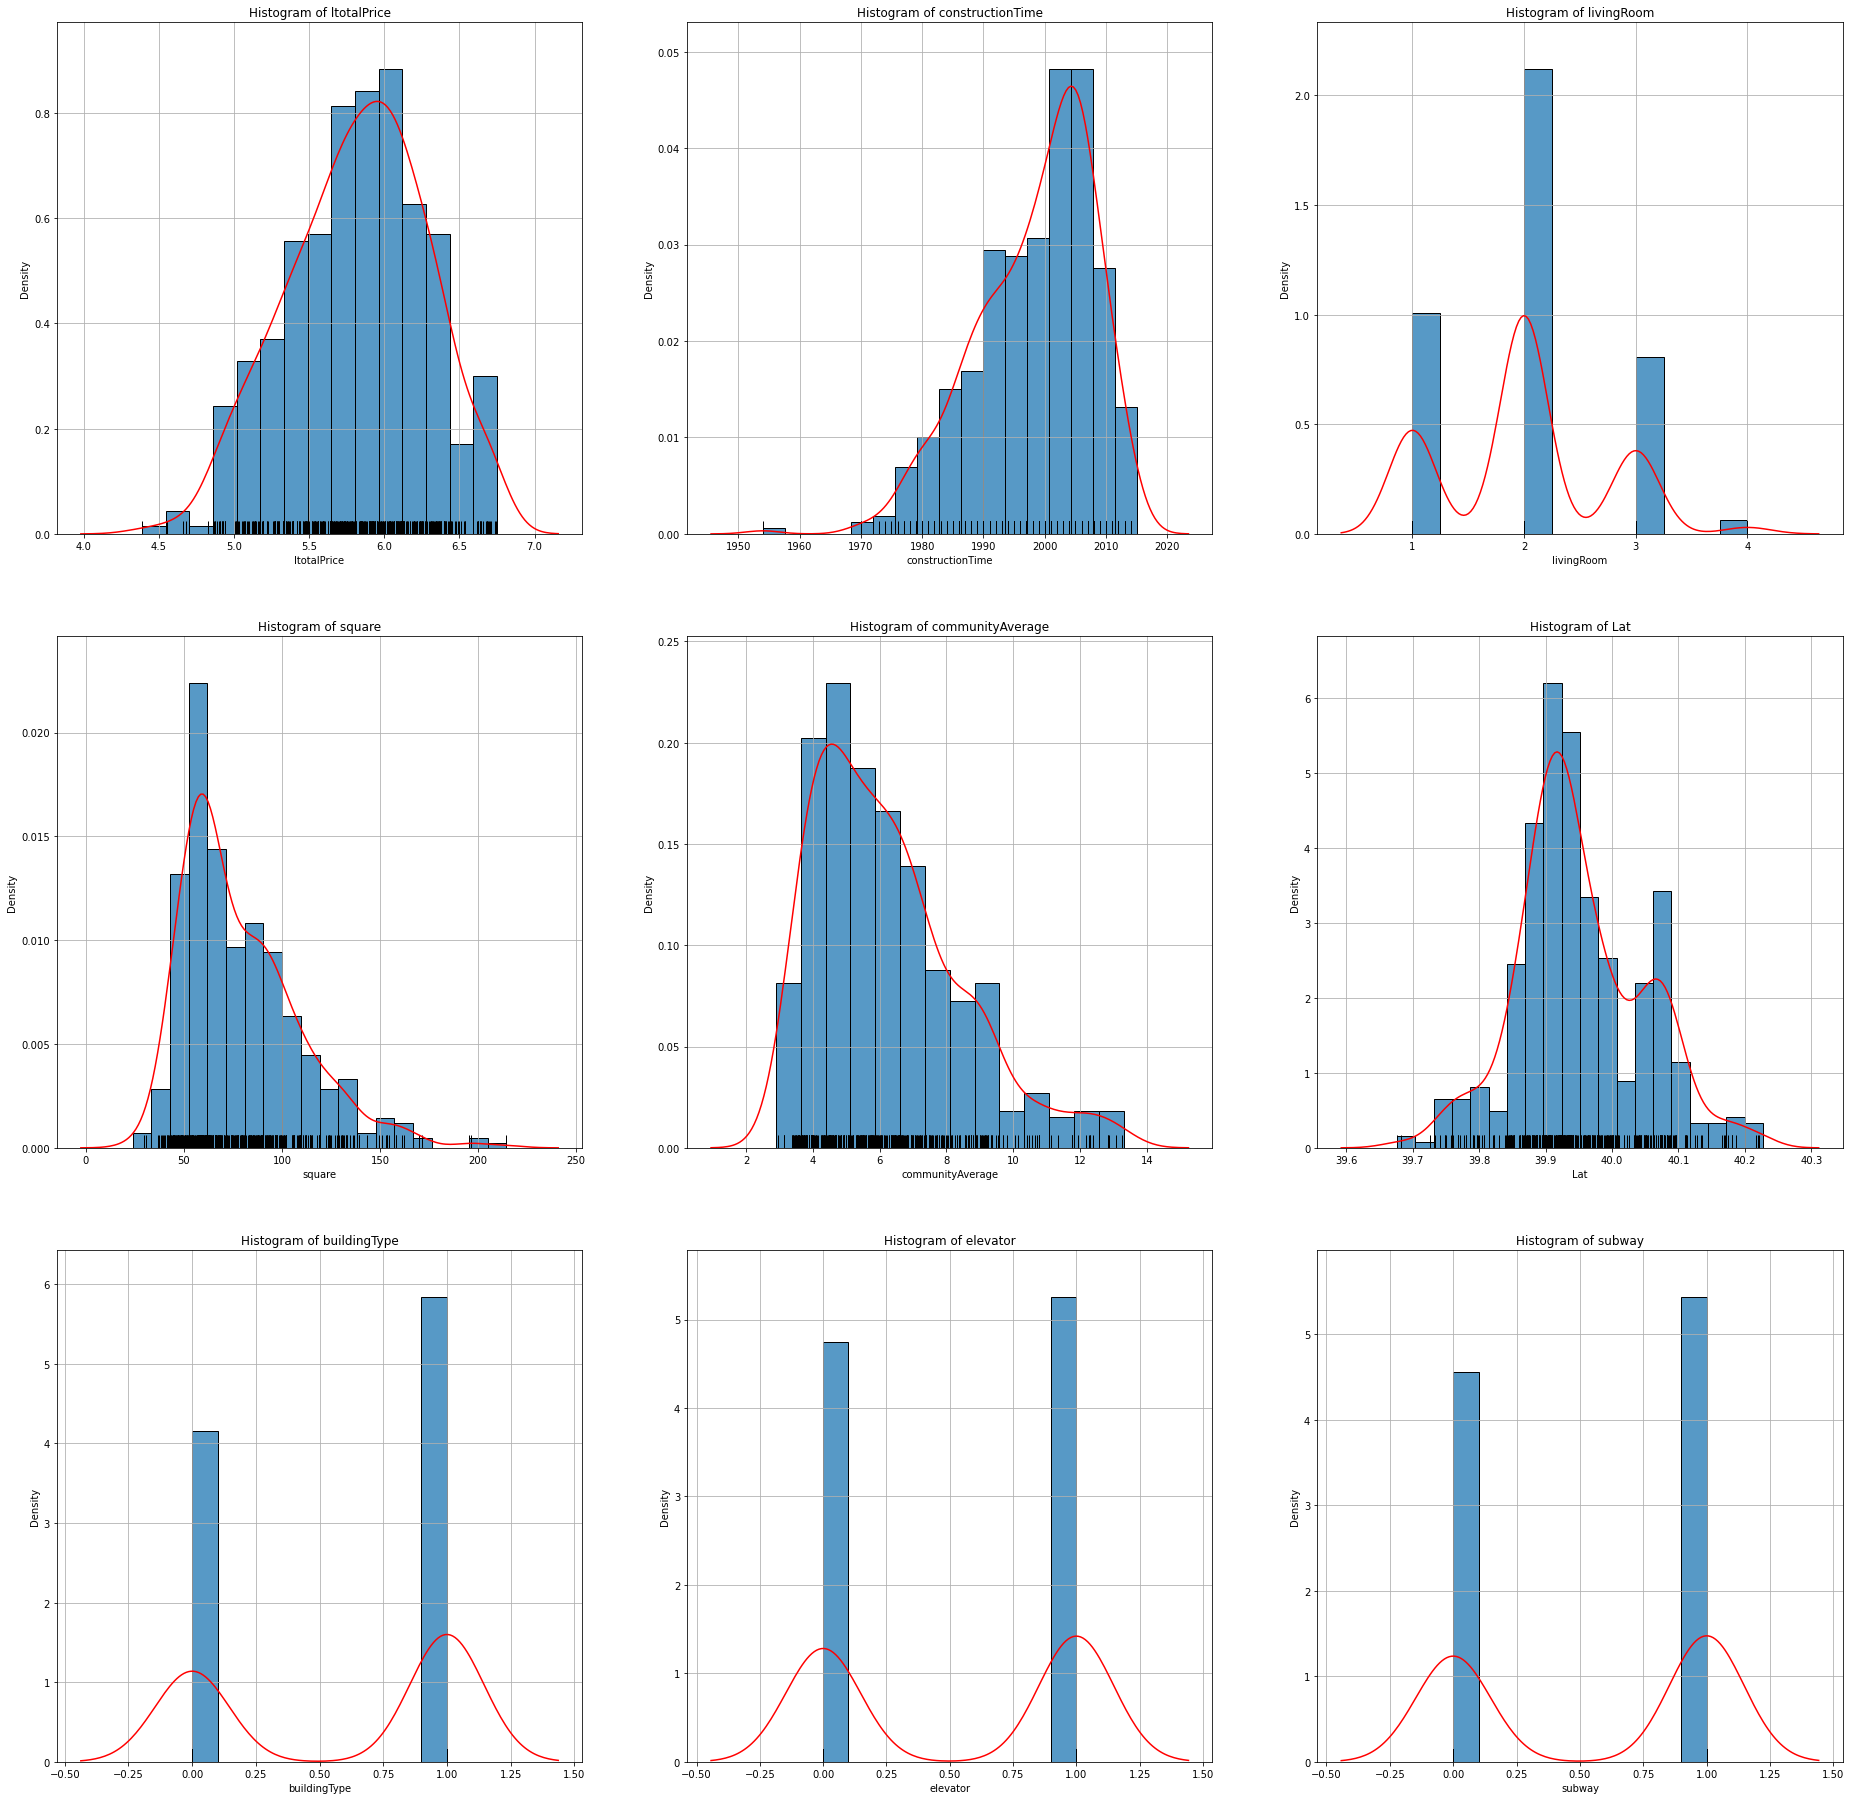

In [7]:
fig, ax = plt.subplots(3, 3, figsize = (32, 32))
for i in range(len(data.columns)):
    plt.subplot(3, 3, i+1)
    plt.title("Histogram of " + str(data.columns[i]))
    sns.kdeplot(data[data.columns[i]], color = "red")
    sns.rugplot(data[data.columns[i]], color = "black")
    sns.histplot(data[data.columns[i]], stat = "density")
    plt.grid()

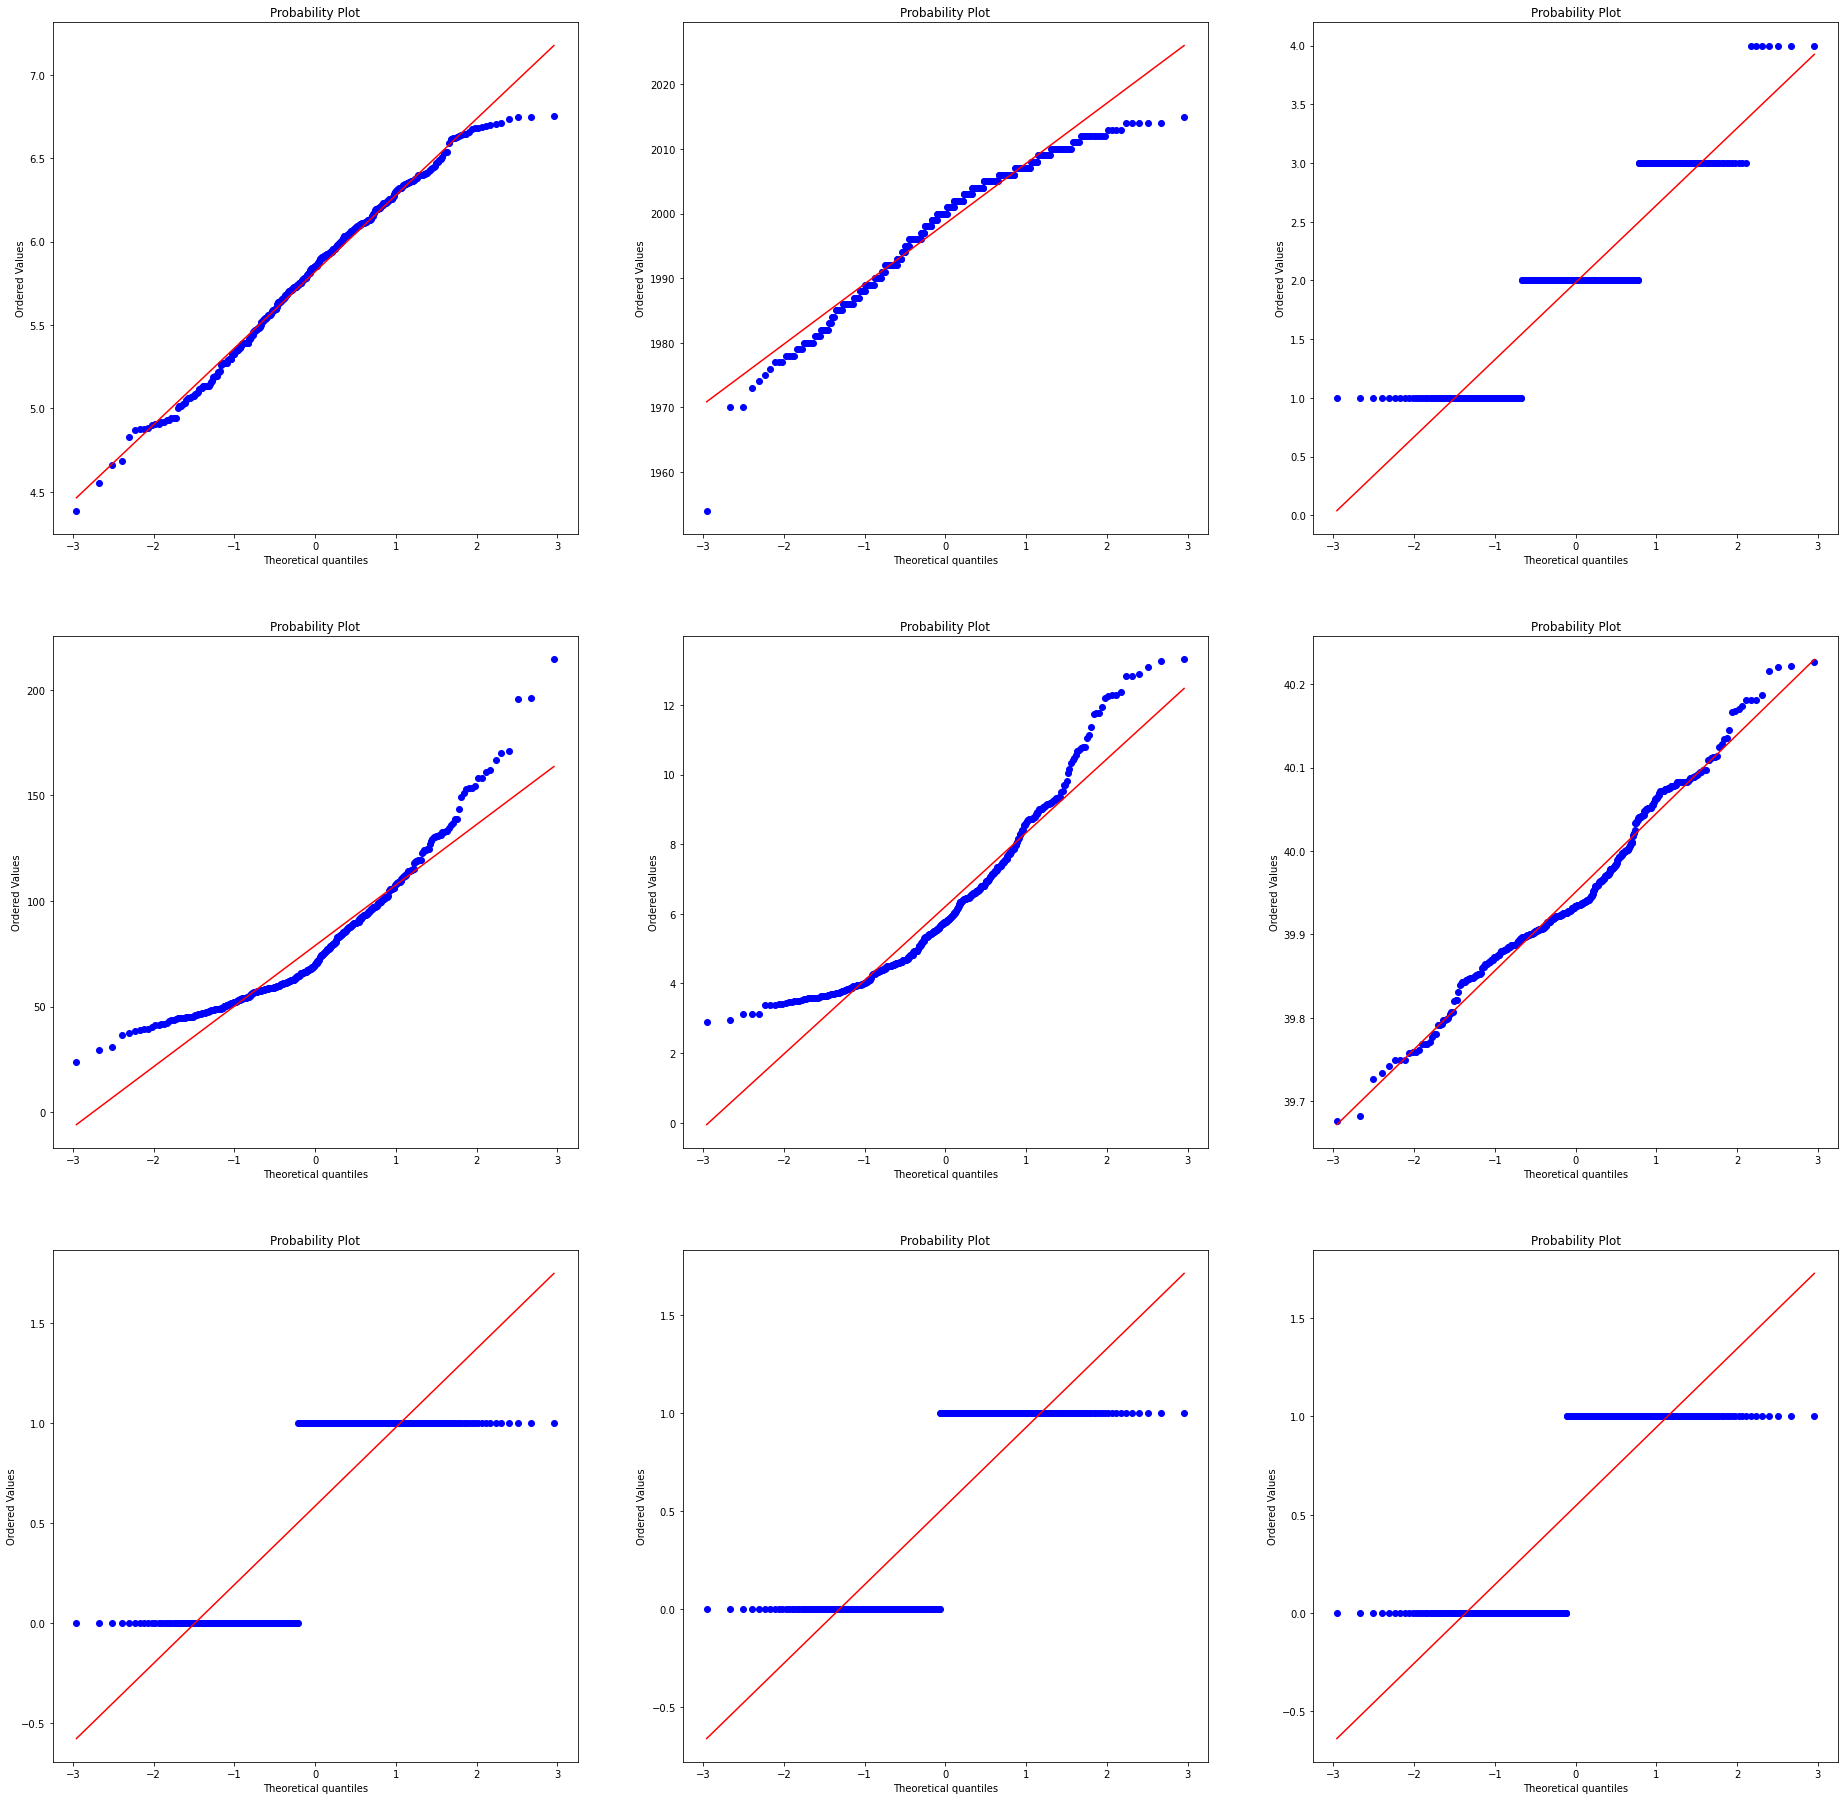

In [8]:
fig, ax = plt.subplots(3, 3, figsize = (32, 32))
for i in range(len(data.columns)):
    plt.subplot(3, 3, i+1)
    plt.title("q-q plot of " + str(data.columns[i]))
    stats.probplot(data[data.columns[i]], dist = "norm", plot = plt)

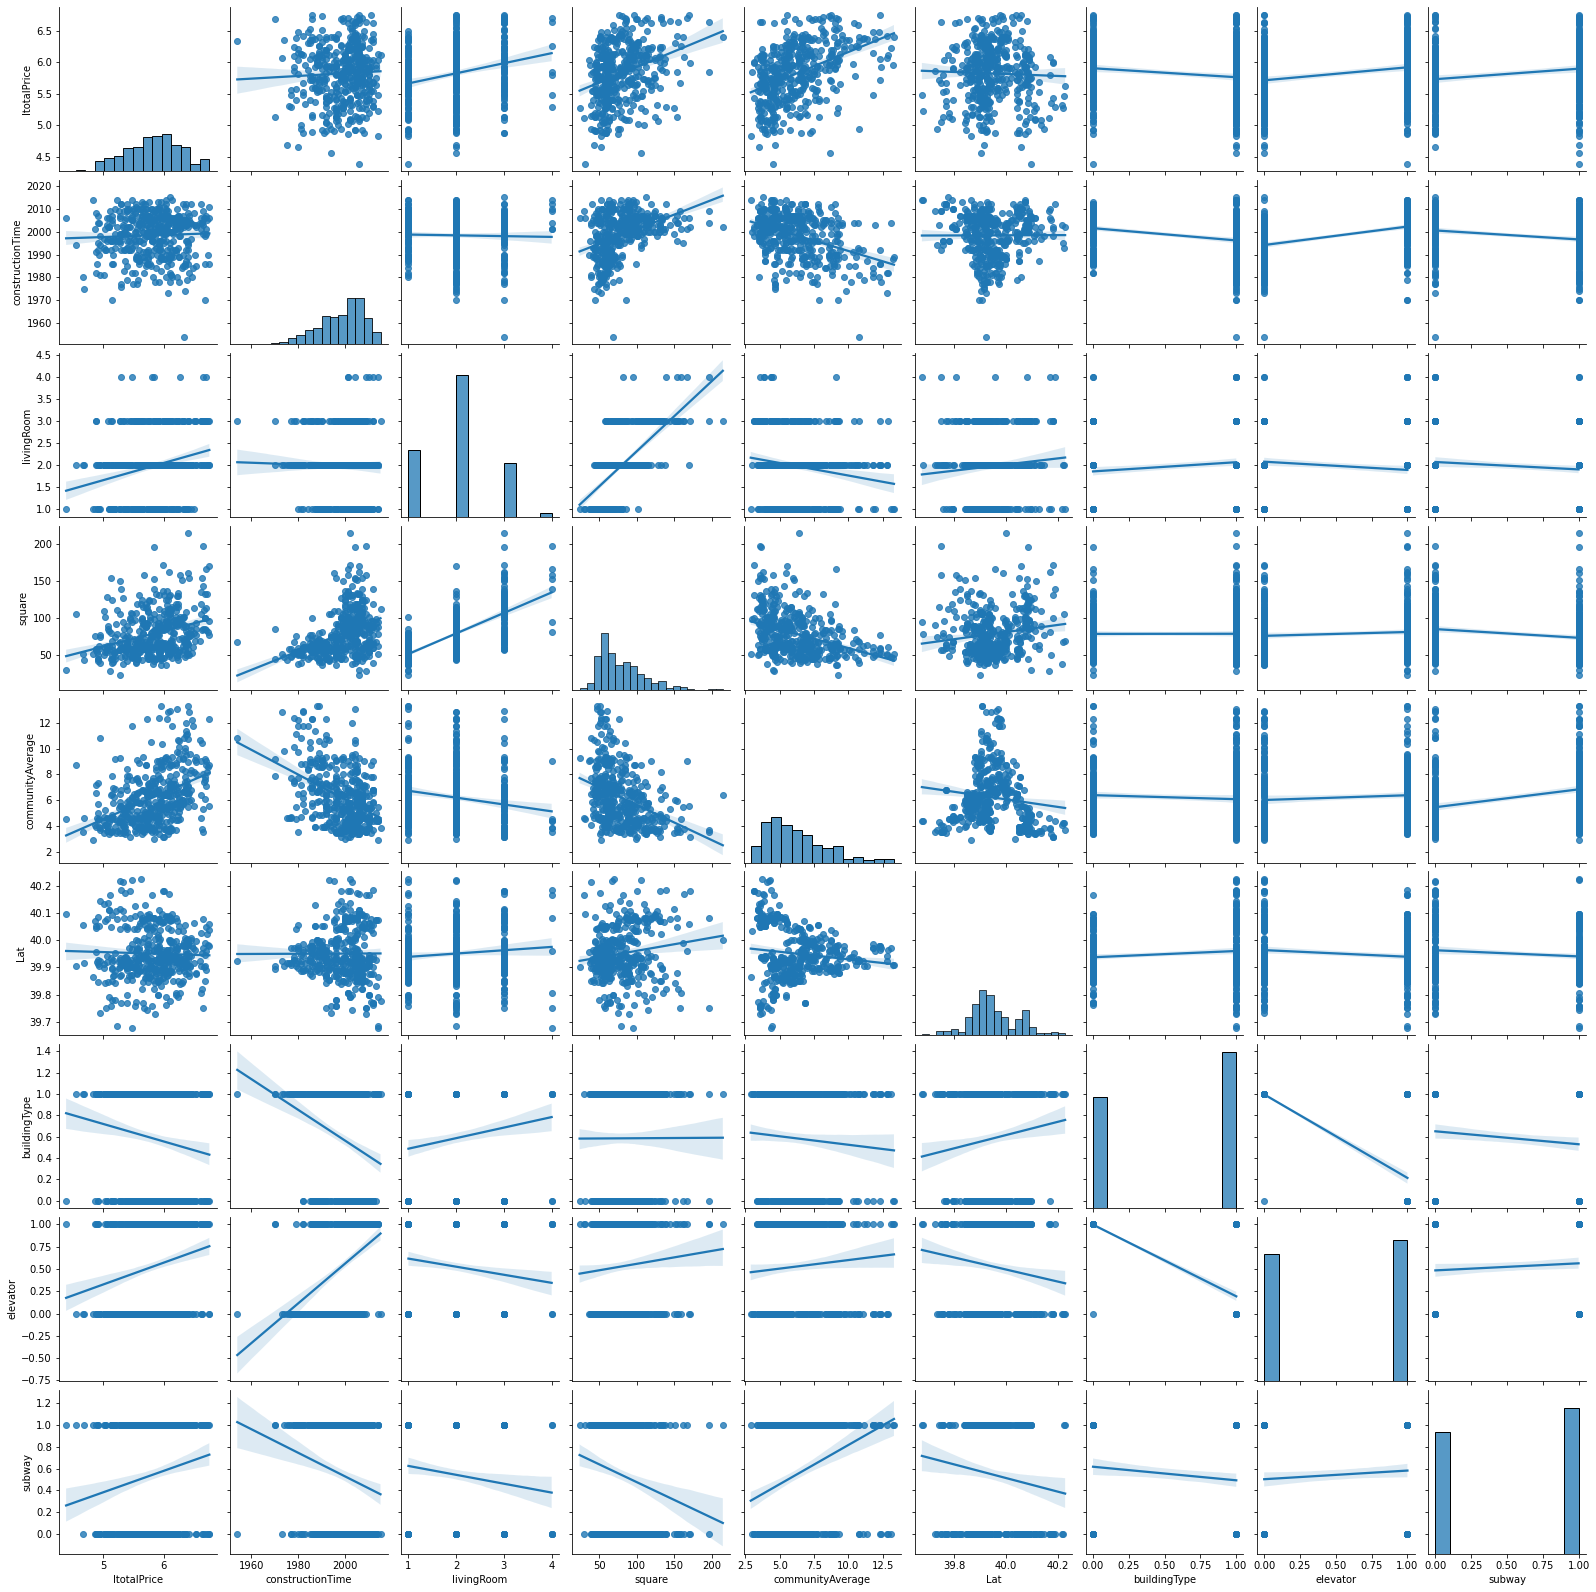

In [9]:
sns.pairplot(data, kind = "reg")

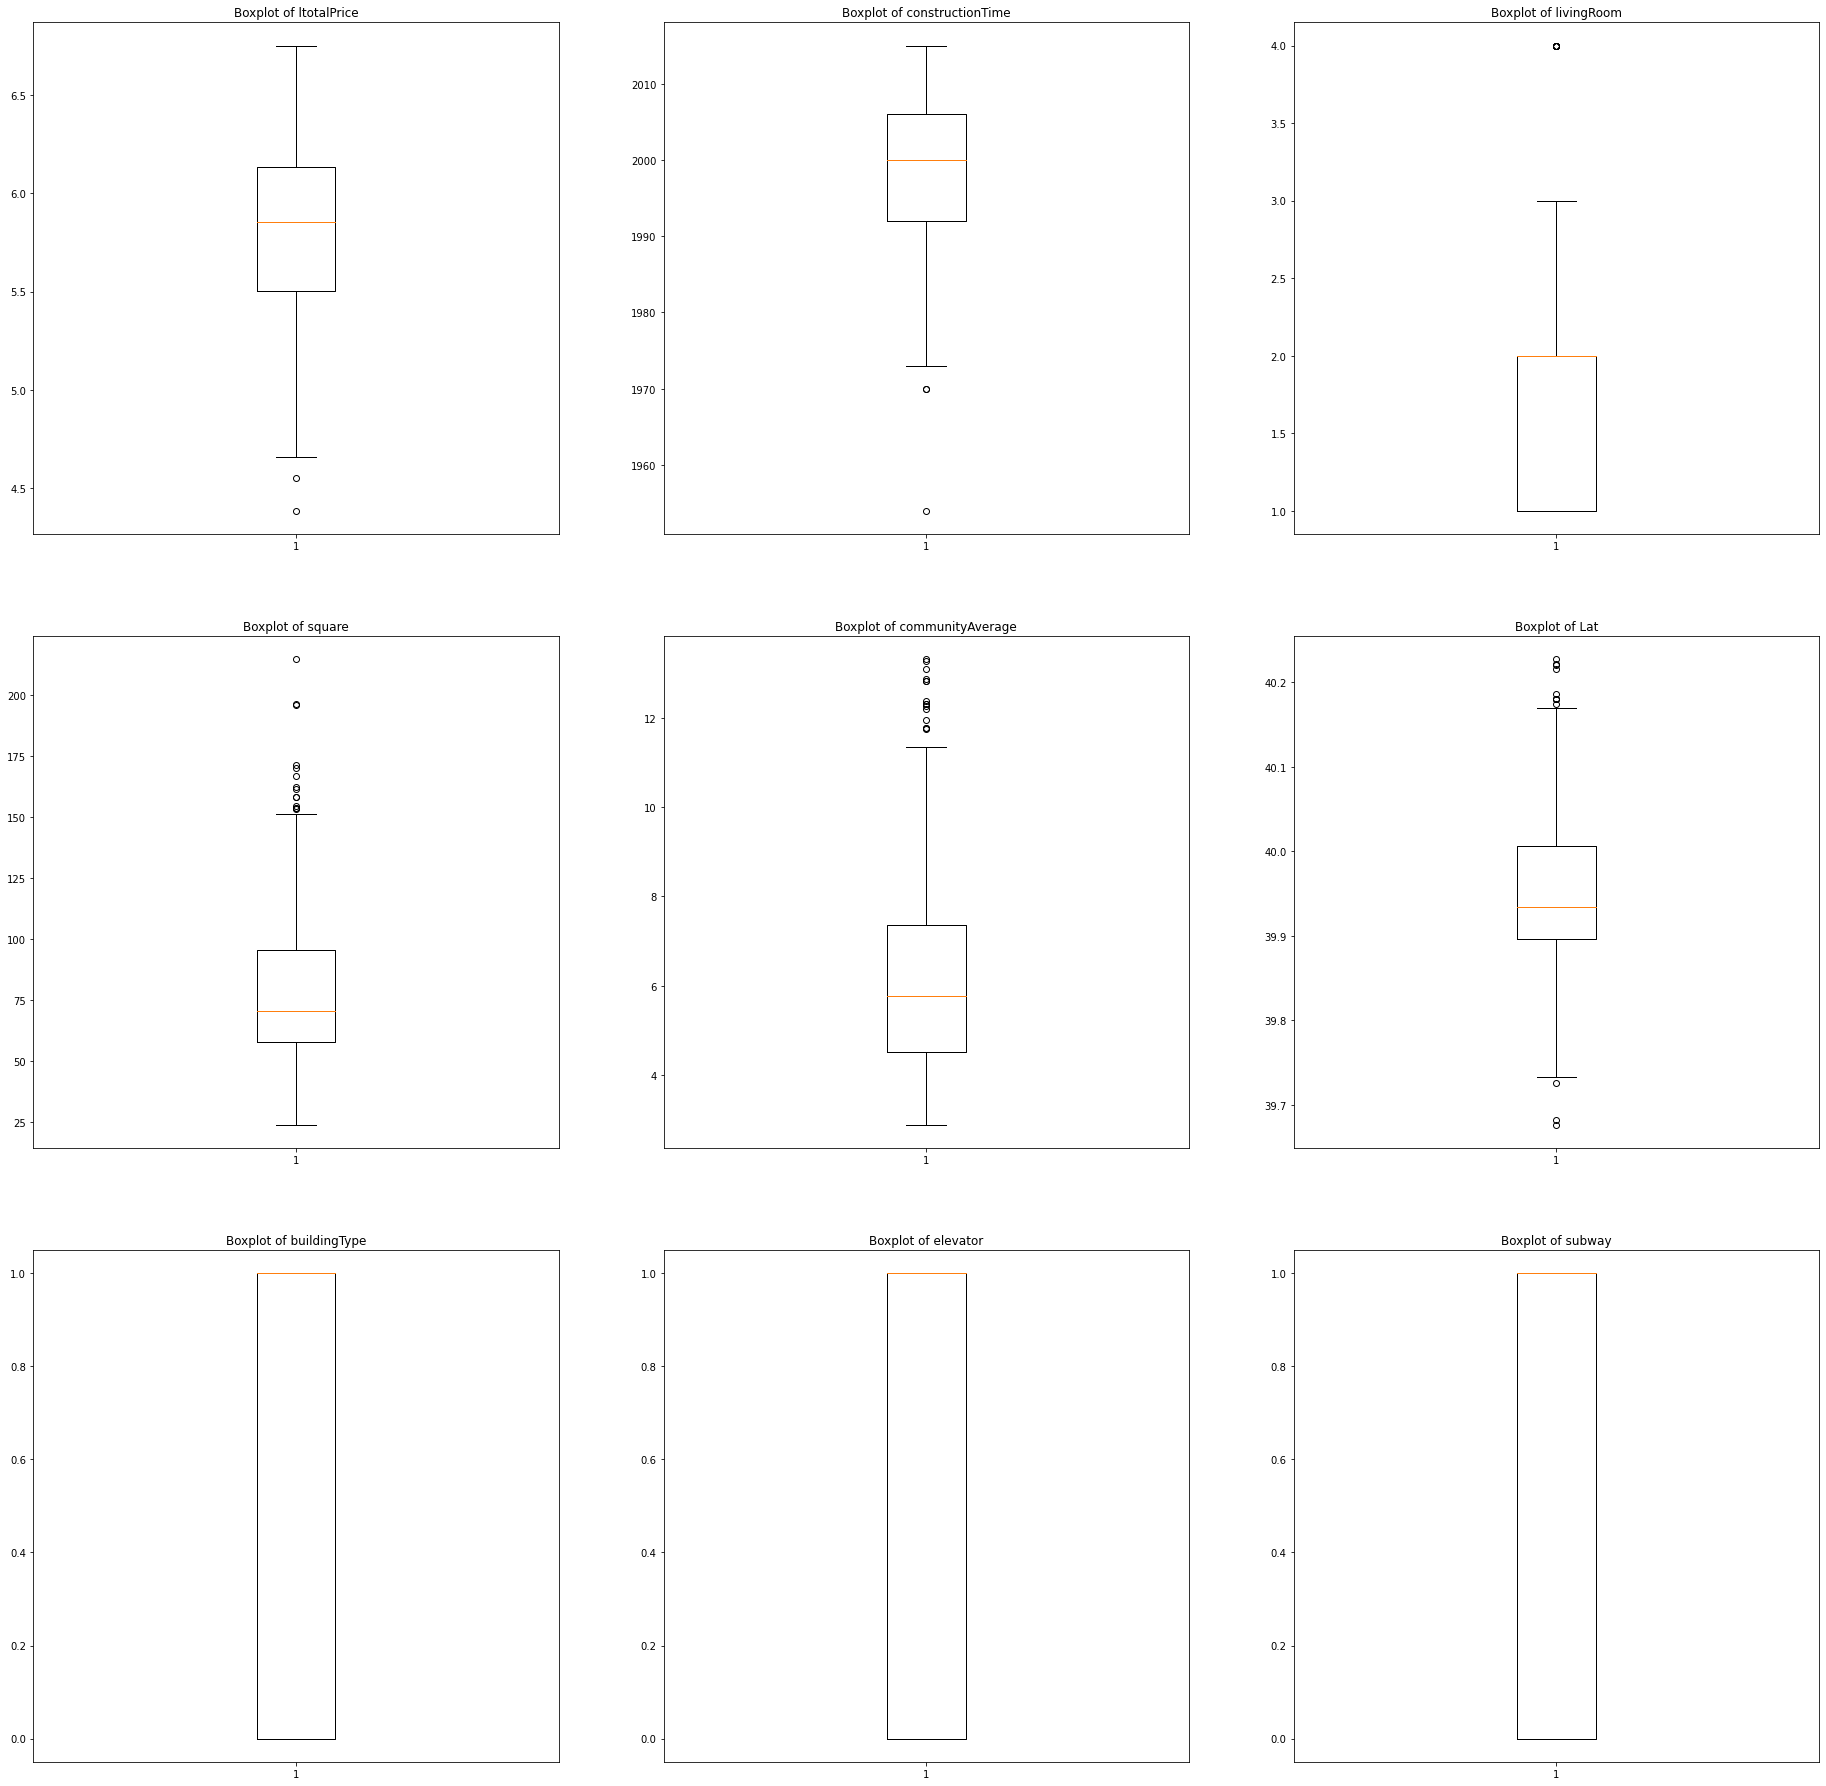

In [9]:
fig, ax = plt.subplots(3, 3, figsize = (32, 32))
for i in range(len(data.columns)):
    plt.subplot(3, 3, i+1)
    plt.title("Boxplot of " + str(data.columns[i]))
    plt.boxplot(data[data.columns[i]])

<AxesSubplot:>

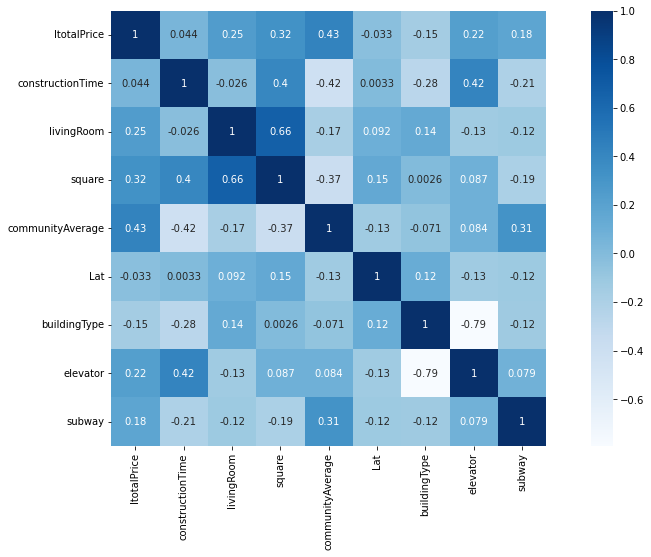

In [10]:
plt.figure(figsize = (16, 8))
c = data.corr()
sns.heatmap(c, cmap = "Blues",annot = True, square = True)

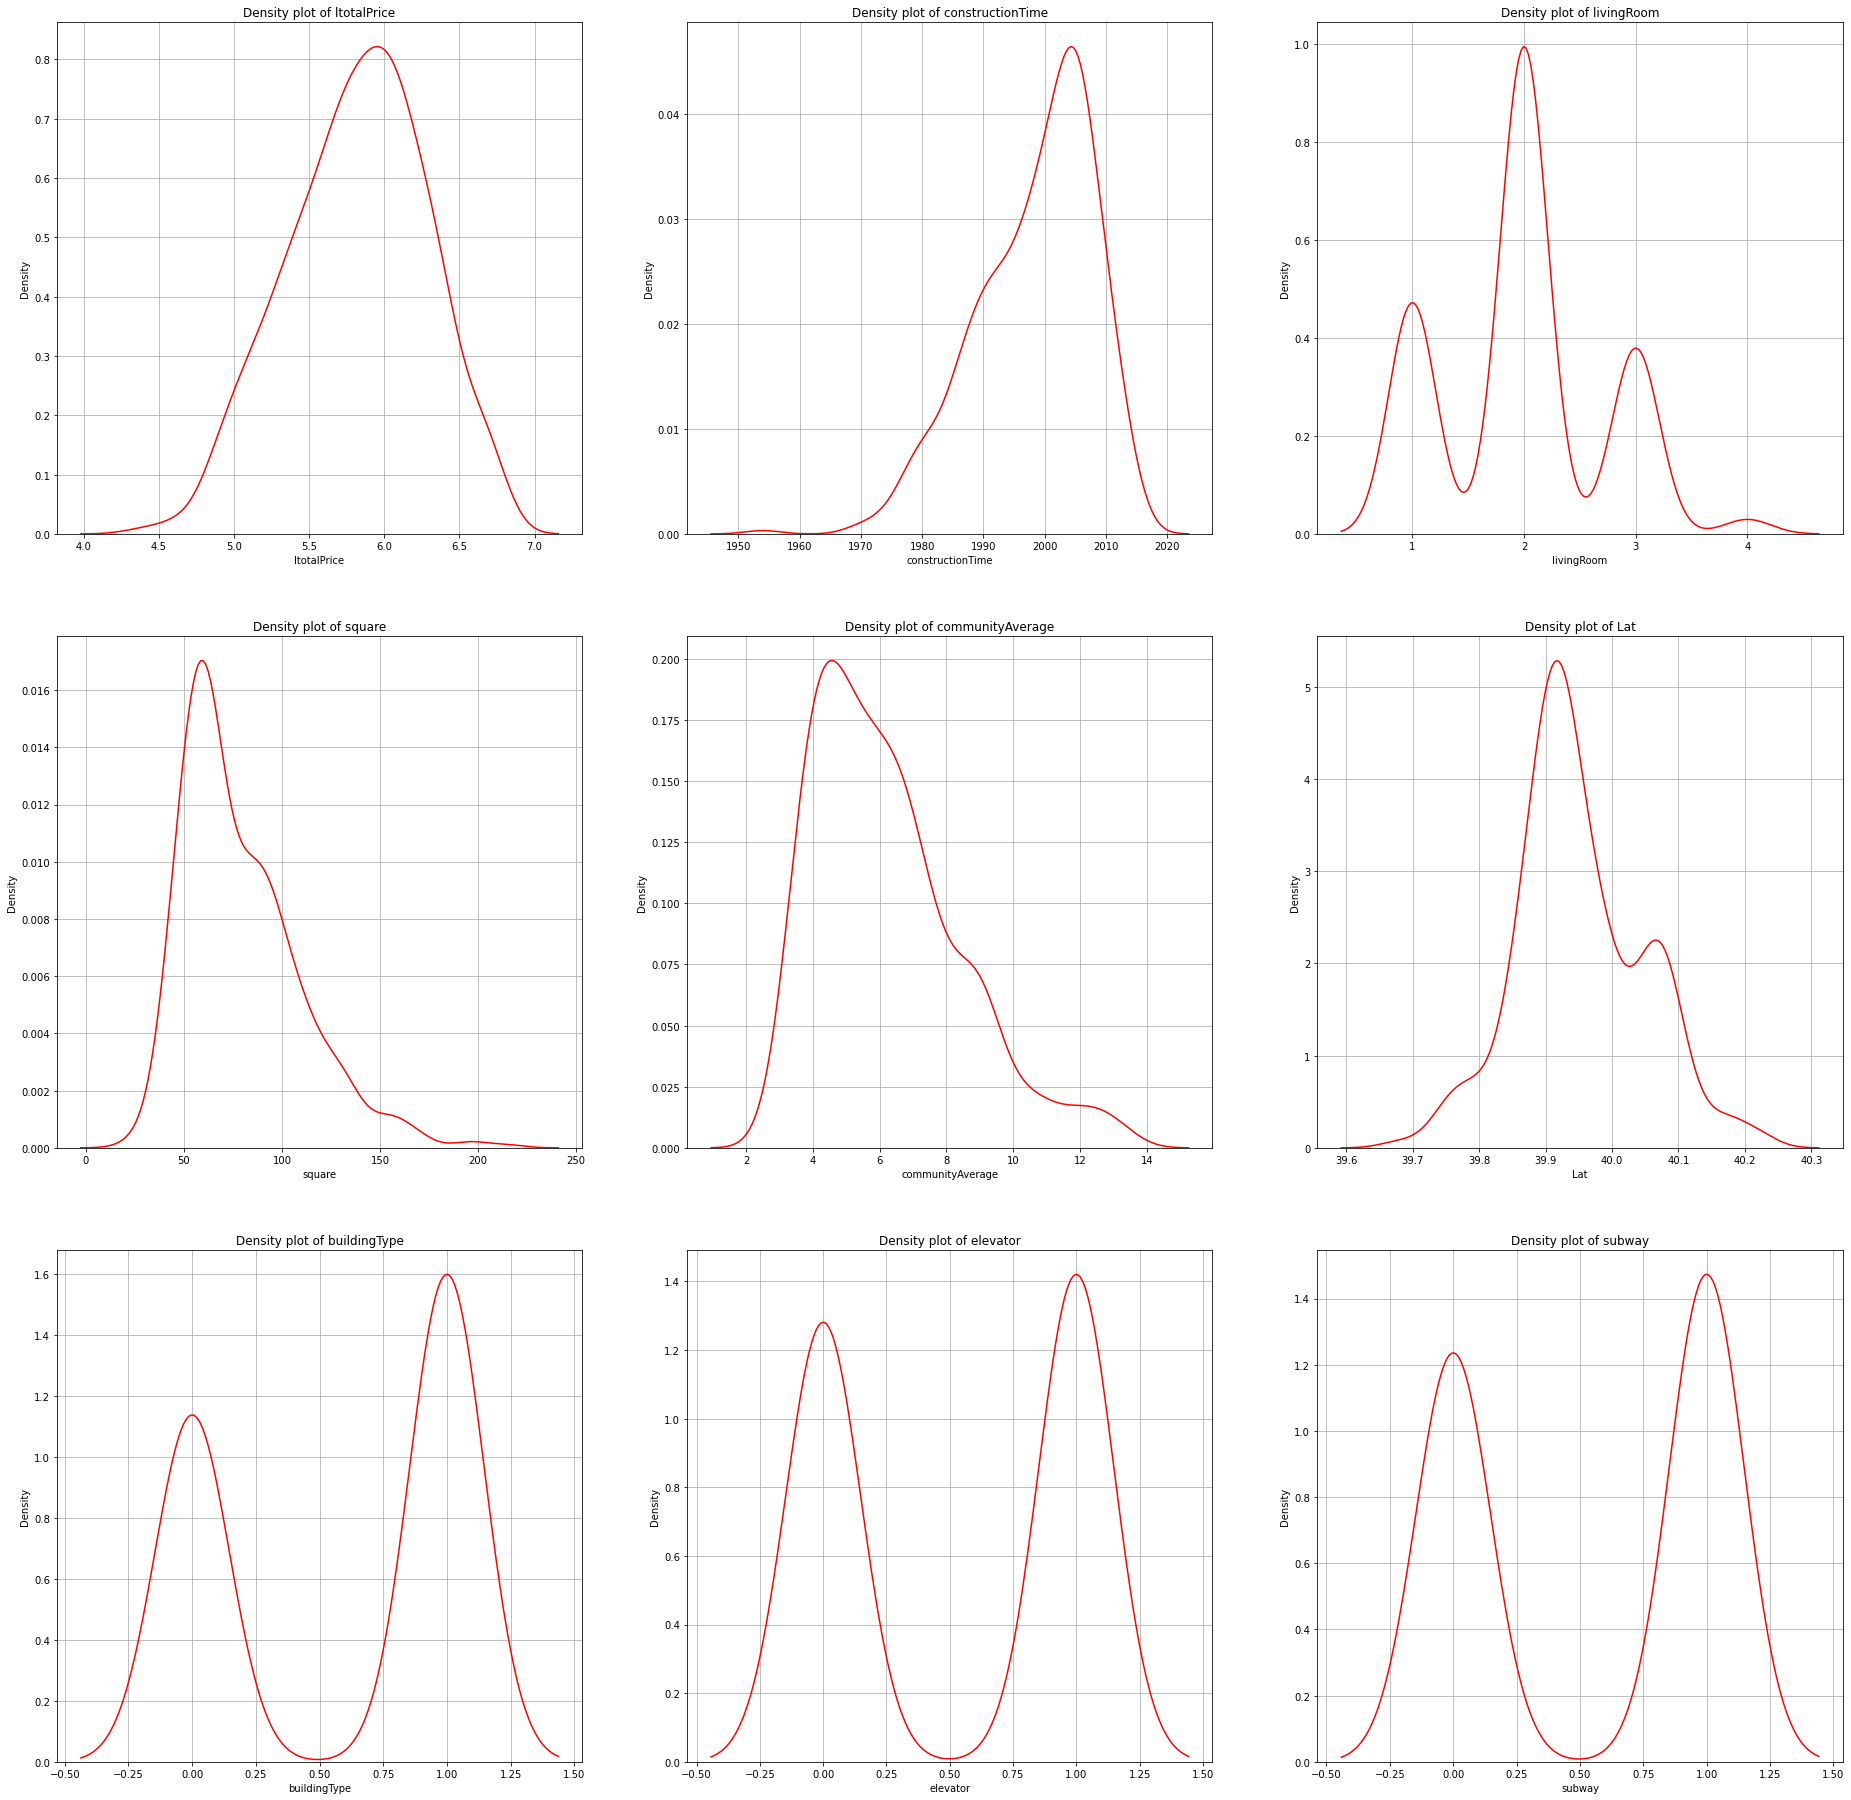

In [11]:
fig, ax = plt.subplots(3, 3, figsize = (32, 32))
for i in range(len(data.columns)):
    plt.subplot(3, 3, i+1)
    plt.title("Density plot of " + str(data.columns[i]))
    sns.kdeplot(data[data.columns[i]], color = "red")
    plt.grid()

### From linearity test, neither of the variables are non-linear with ltotalPrice since we fail to reject the null of linearity. Besides, to keep interpretability, we think no need to transform variables.

In [12]:
name = ["t-stat", "p-value"]
test1 = sms.linear_harvey_collier(smf.ols(formula='ltotalPrice~constructionTime', data=data).fit())
test2 = sms.linear_harvey_collier(smf.ols(formula='ltotalPrice~livingRoom', data=data).fit())
test3 = sms.linear_harvey_collier(smf.ols(formula='ltotalPrice~square', data=data).fit())
test4 = sms.linear_harvey_collier(smf.ols(formula='ltotalPrice~communityAverage', data=data).fit())
test5 = sms.linear_harvey_collier(smf.ols(formula='ltotalPrice~Lat', data=data).fit())
print("constructionTime:",list(zip(name, test1)),"\n"
      "livingRoom:",list(zip(name, test2)),"\n"
      "square:",list(zip(name, test3)),"\n"
      "communityAverage:",list(zip(name, test4)),"\n"
      "Lat:",list(zip(name, test5)))

constructionTime: [('t-stat', 1.537086144511464), ('p-value', 0.12498935644225237)] 
livingRoom: [('t-stat', 1.4934852568838908), ('p-value', 0.13602530885518146)] 
square: [('t-stat', 1.183823582855362), ('p-value', 0.2371206049870957)] 
communityAverage: [('t-stat', 1.33424743574698), ('p-value', 0.18281132567207167)] 
Lat: [('t-stat', 1.376320686124852), ('p-value', 0.16942079881294475)]


### Despite the outliers and not normally distributed features of the variables, we think that those outliers are important and cannot be exclued because they may be legitimate members of the population being studied. Not including these observations may lead an analyst to ignore important dynamics in the underlying population

### Model Building

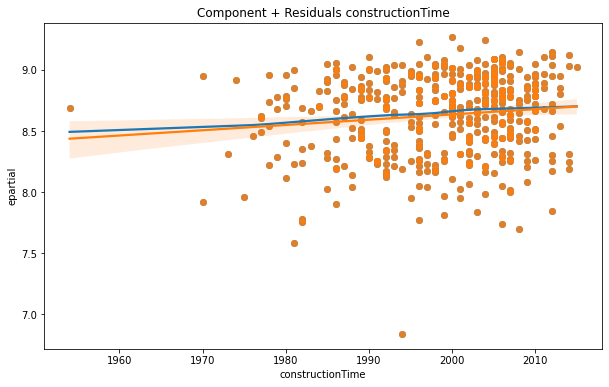

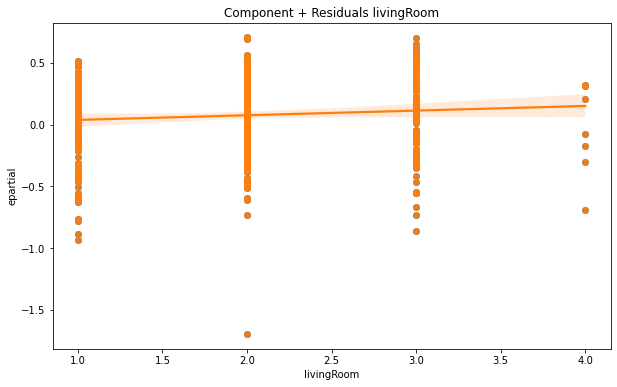

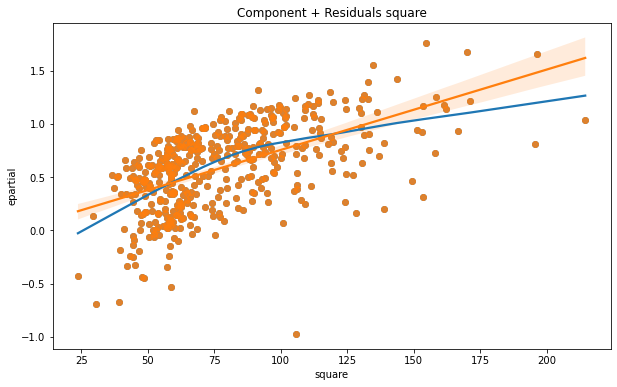

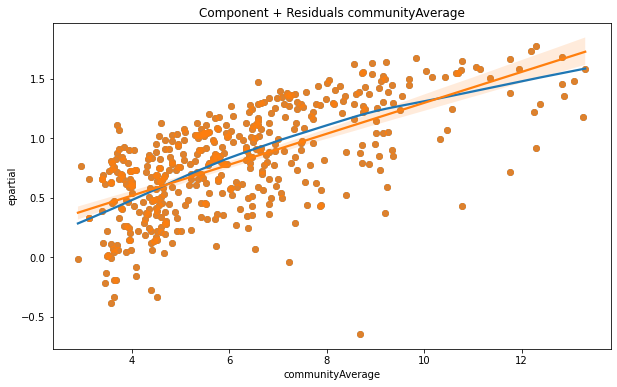

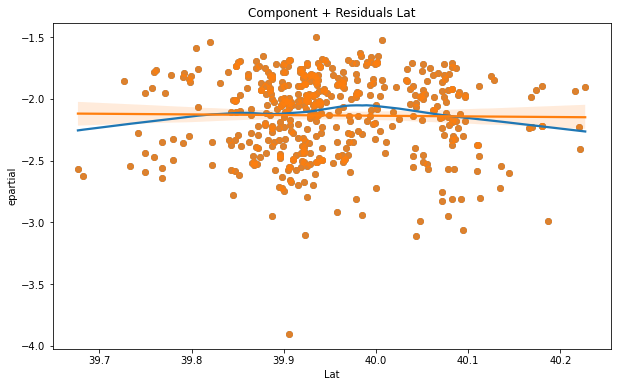

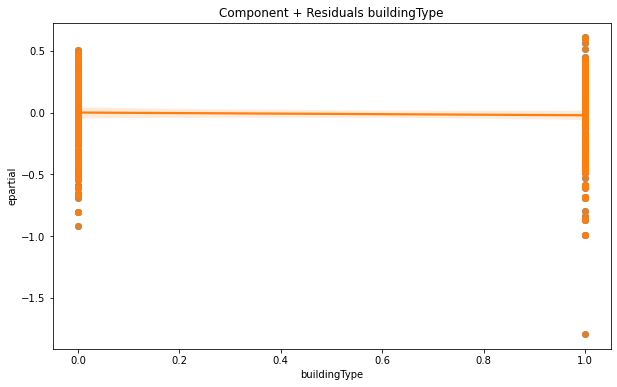

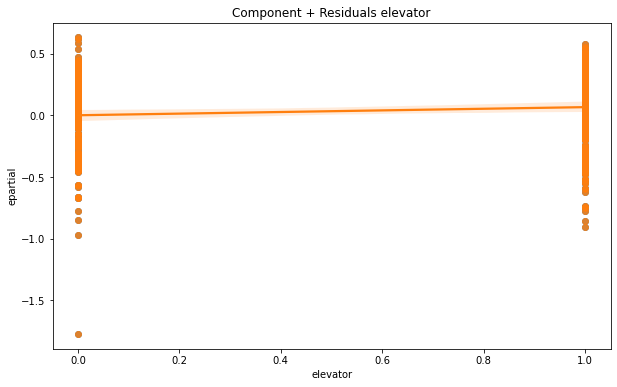

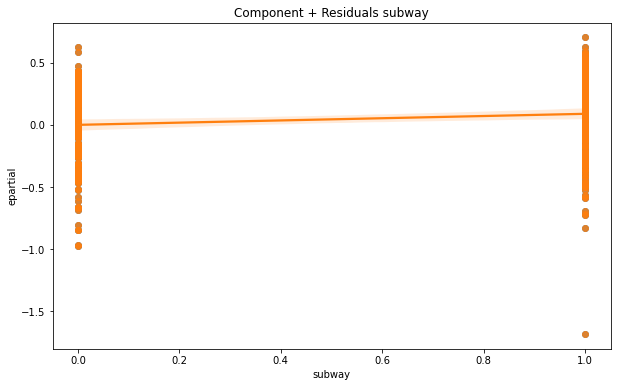

In [19]:
fit = smf.ols('ltotalPrice ~ constructionTime + livingRoom + square + communityAverage + Lat + buildingType + elevator + subway', data = data).fit()
def ccpr_plot(model, data, variable):
    df_copy = data.copy()
    df_copy["epartial"] = model.resid + model.params[variable]*data[variable]
    plt.figure(figsize = (10, 6))
    sns.regplot(x = variable, y = "epartial", data =df_copy, lowess = True)
    sns.regplot(x = variable, y = "epartial", data =df_copy)
    plt.title("Component + Residuals " + variable)
columns = ['constructionTime', 'livingRoom', 'square', 'communityAverage', 'Lat',"buildingType", "elevator", "subway"]
for i in columns:
    ccpr_plot(fit, data, i)

In [20]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ltotalPrice   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     50.40
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           2.00e-57
Time:                        14:29:21   Log-Likelihood:                -138.59
No. Observations:                 445   AIC:                             295.2
Df Residuals:                     436   BIC:                             332.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.2209      8.562     -0.259      0.795     -19.049      14.607
constructionTime     0.0043      0.002      1.820      0.069      -0.000       0.009
livingRoom           0.0377      0.033      1.150      0.251      -0.027       0.102
square               0.0075      0.001      8.615      0.000       0.006       0.009
communityAverage     0.1299      0.009     14.721      0.000       0.113       0.147
Lat                 -0.0534      0.172     -0.311      0.756      -0.391       0.284
buildingType        -0.0220      0.053     -0.413      0.680      -0.127       0.083
elevator             0.0658      0.057      1.147      0.252      -0.047       0.179
subway               0.0889      0.034      2.605      0.009       0.022       0.156
==============================================================================
Omnibus:                       54.425   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.001
Skew:                          -0.834   Prob(JB):                     1.15e-17
Kurtosis:                       4.194   Cond. No.                     1.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
y, X = pt.dmatrices('ltotalPrice ~ constructionTime + livingRoom + square + communityAverage + Lat + buildingType + elevator + subway', data = data,
                   return_type = 'dataframe')
k = X.shape[1]
VIF = np.empty(k)
for i in range(k):
    VIF[i] = smo.variance_inflation_factor(X.values, i)
    print(VIF[i])

292812.1566593157
2.031533925583488
2.2182243618999915
2.7307107452182264
1.4897820379879727
1.0594006757360266
2.7632391371914014
3.275452751768306
1.1528336140014372


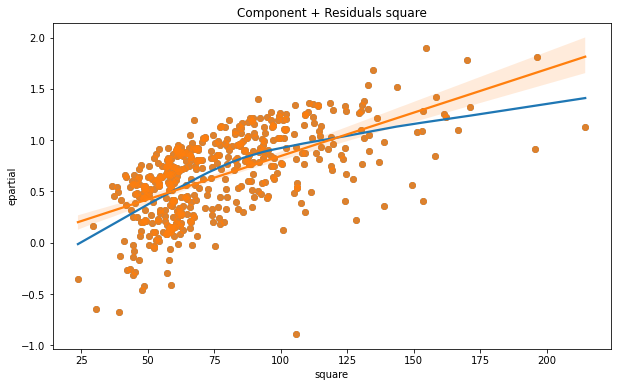

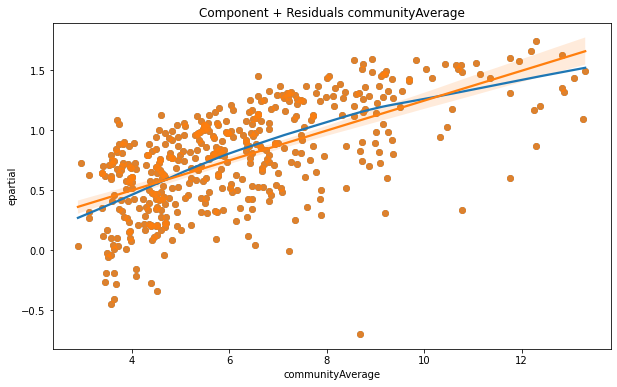

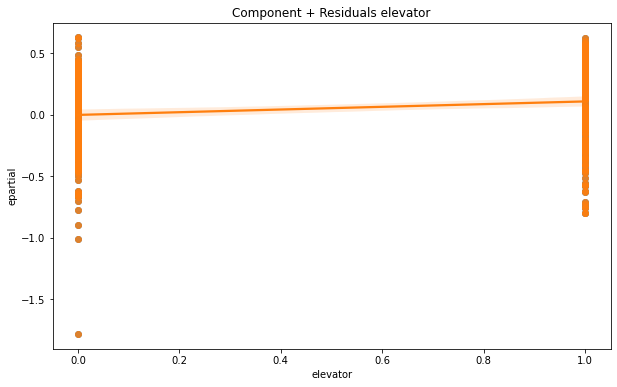

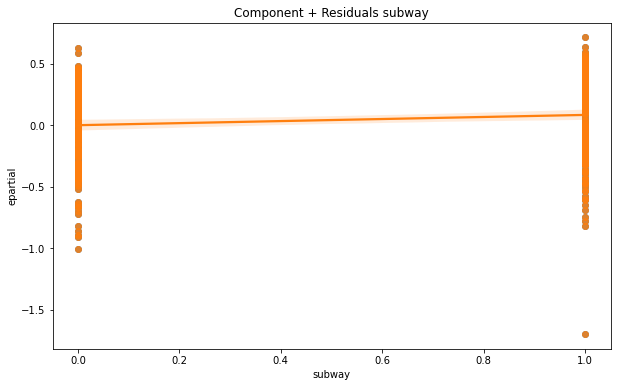

In [22]:
fit = smf.ols('ltotalPrice ~ square + communityAverage + elevator + subway', data = data).fit()
def ccpr_plot(model, data, variable):
    df_copy = data.copy()
    df_copy["epartial"] = model.resid + model.params[variable]*data[variable]
    plt.figure(figsize = (10, 6))
    sns.regplot(x = variable, y = "epartial", data =df_copy, lowess = True)
    sns.regplot(x = variable, y = "epartial", data =df_copy)
    plt.title("Component + Residuals " + variable)
columns=['square', 'communityAverage', "elevator", "subway"]
for i in columns:
    ccpr_plot(fit, data, i)

In [23]:
y, X = pt.dmatrices('ltotalPrice ~ square + communityAverage + elevator + subway', data = data,
                   return_type = 'dataframe')
k = X.shape[1]
VIF = np.empty(k)
for i in range(k):
    VIF[i] = smo.variance_inflation_factor(X.values, i)
    print(VIF[i])

25.32120623407597
1.1908093239687043
1.2626203210771865
1.0284177462672441
1.1237756281564488


In [24]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ltotalPrice   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     99.86
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           2.03e-60
Time:                        14:36:25   Log-Likelihood:                -140.57
No. Observations:                 445   AIC:                             291.1
Df Residuals:                     440   BIC:                             311.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.2752      0.080     53.702      0.000       4.119       4.432
square               0.0085      0.001     14.614      0.000       0.007       0.010
communityAverage     0.1247      0.008     15.351      0.000       0.109       0.141
elevator             0.1098      0.032      3.416      0.001       0.047       0.173
subway               0.0837      0.034      2.486      0.013       0.018       0.150
==============================================================================
Omnibus:                       57.797   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.197
Skew:                          -0.862   Prob(JB):                     3.16e-19
Kurtosis:                       4.274   Cond. No.                         427.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
y, X = pt.dmatrices('ltotalPrice ~ square + communityAverage + elevator + subway', data = data,
                   return_type = 'dataframe')
sm.stats.diagnostic.het_breuschpagan(fit.resid, X)

(4.992623370700263, 0.2880552212765556, 1.2481349176100578, 0.2898012572310486)

In [26]:
sm.stats.diagnostic.het_white(fit.resid, X)

(15.74573975338608,
 0.20316114590969875,
 1.320538160288112,
 0.20334837636913192)

In [27]:
sortedv = data.sort_values(by = "elevator").copy().reset_index()
splt = sortedv.elevator.argmax()
gq_reg = smf.ols('ltotalPrice ~ square + communityAverage + elevator + subway', sortedv).fit()
y = gq_reg.model.endog
X = gq_reg.model.exog
# Order is f-stat, pvalue, hypothesis
sm.stats.diagnostic.het_goldfeldquandt(y, X, alternative = 'two-sided', split= splt)

(0.9237376157856262, 0.5568521484223463, 'two-sided')

In [28]:
sortedv = data.sort_values(by = "subway").copy().reset_index()
splt = sortedv.subway.argmax()
gq_reg = smf.ols('ltotalPrice ~ square + communityAverage + elevator + subway', sortedv).fit()
y = gq_reg.model.endog
X = gq_reg.model.exog
sm.stats.diagnostic.het_goldfeldquandt(y, X, alternative = 'two-sided', split= splt)

(1.0603714125209074, 0.6696898910120246, 'two-sided')

Suggested Power Transformation: 0.7450789592206308


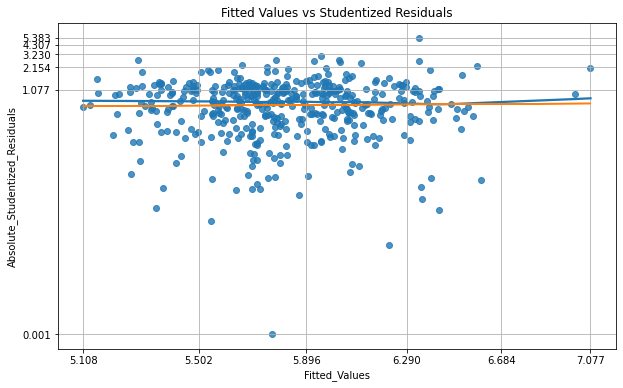

In [29]:
def spread_level(model, data):
    df_copy = data.copy()
    
    # Get the studentized residuals
    df_copy["Absolute_Studentized_Residuals"] = (np.abs(model.get_influence().resid_studentized))
    df_copy["Fitted_Values"] = (model.fittedvalues)
    
    # run regression to get slope of fitted vs resid, rlm is a robust linear model used by R
    slreg = smf.rlm("np.log(Absolute_Studentized_Residuals) ~ np.log(Fitted_Values)", df_copy).fit()
    slope = slreg.params[1]
    
    # plot values
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.set_title("Fitted Values vs Studentized Residuals")
    sns.regplot(x = "Fitted_Values", y = "Absolute_Studentized_Residuals", data = df_copy, lowess = True, ax = ax)
    ax.plot(df_copy.Fitted_Values.values, np.exp(slreg.fittedvalues).values)
    
    # Set to the logarithmic scale
    ax.set_yscale('log')
    ax.set_xscale('log')
    
    # convert froms scientific notation to scalar notation
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_major_formatter(ScalarFormatter())
    
    # Resolve overlapping label bug
    ax.minorticks_off()
    
    # Set tick labels automatically
    ax.set_xticks(np.linspace(df_copy["Fitted_Values"].min(),df_copy["Fitted_Values"].max(), 6))
    ax.set_yticks(np.linspace(df_copy["Absolute_Studentized_Residuals"].min(),
                              df_copy["Absolute_Studentized_Residuals"].max(), 6))
    
    ax.grid()
    
    # return a suggested power transform of your y-variable that may correct heteroscedastcity
    # The transform is just one minus the slope of the reegression line of your fitted values vs residuals
    print("Suggested Power Transformation:", 1-slope)
spread_level(fit,data)

In [30]:
robust_reg = smf.ols('ltotalPrice ~ square + communityAverage + elevator + subway', data).fit(cov_type = 'HC0')
robust_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ltotalPrice   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     87.00
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           2.08e-54
Time:                        14:44:49   Log-Likelihood:                -140.57
No. Observations:                 445   AIC:                             291.1
Df Residuals:                     440   BIC:                             311.6
Df Model:                           4                                         
Covariance Type:                  HC0                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.2752      0.087     49.357      0.000       4.105       4.445
square               0.0085      0.001     12.032      0.000       0.007       0.010
communityAverage     0.1247      0.009     14.609      0.000       0.108       0.141
elevator             0.1098      0.033      3.358      0.001       0.046       0.174
subway               0.0837      0.033      2.558      0.011       0.020       0.148
==============================================================================
Omnibus:                       57.797   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.197
Skew:                          -0.862   Prob(JB):                     3.16e-19
Kurtosis:                       4.274   Cond. No.                         427.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [31]:
data["ehatsq"] = fit.resid**2
w_est = smf.ols('np.log(ehatsq) ~ square + communityAverage + elevator + subway', data = data).fit()
vari = np.exp(w_est.fittedvalues) 
w = 1/vari**2
fgls = smf.wls('ltotalPrice ~ square + communityAverage + elevator + subway', data, weights = w).fit()
fgls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            ltotalPrice   R-squared:                       0.474
Model:                            WLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     99.16
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           4.20e-60
Time:                        14:44:52   Log-Likelihood:                -144.46
No. Observations:                 445   AIC:                             298.9
Df Residuals:                     440   BIC:                             319.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.2863      0.079     54.302      0.000       4.131       4.441
square               0.0084      0.001     14.452      0.000       0.007       0.010
communityAverage     0.1233      0.008     15.575      0.000       0.108       0.139
elevator             0.1116      0.032      3.475      0.001       0.048       0.175
subway               0.0867      0.034      2.582      0.010       0.021       0.153
==============================================================================
Omnibus:                       60.311   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.550
Skew:                          -0.872   Prob(JB):                     8.00e-21
Kurtosis:                       4.397   Cond. No.                         423.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
print(fit.summary(), robust_reg.summary(), fgls.summary())

                            OLS Regression Results                            
Dep. Variable:            ltotalPrice   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     99.86
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           2.03e-60
Time:                        14:44:54   Log-Likelihood:                -140.57
No. Observations:                 445   AIC:                             291.1
Df Residuals:                     440   BIC:                             311.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.2752      0.080  

In [33]:
test = dg.linear_reset(fit, power = 2,  test_type = 'fitted', use_f = True)
print(blue("Ramsey-RESET:", ['bold']))
print(test)

Ramsey-RESET:
<F test: F=array([[11.16034234]]), p=0.000907036881475591, df_denom=439, df_num=1>


In [34]:
smf.ols('ltotalPrice ~ square + communityAverage + elevator + subway + I(square * communityAverage)', data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ltotalPrice   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     83.06
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           2.87e-61
Time:                        14:52:32   Log-Likelihood:                -136.16
No. Observations:                 445   AIC:                             284.3
Df Residuals:                     439   BIC:                             308.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        4.6213      0.141     32.807      0.000       4.344       4.898
square                           0.0037      0.002      2.178      0.030       0.000       0.007
communityAverage                 0.0653      0.022      3.030      0.003       0.023       0.108
elevator                         0.0876      0.033      2.679      0.008       0.023       0.152
subway                           0.0701      0.034      2.081      0.038       0.004       0.136
I(square * communityAverage)     0.0009      0.000      2.966      0.003       0.000       0.001
==============================================================================
Omnibus:                       68.641   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.909
Skew:                          -0.902   Prob(JB):                     3.37e-27
Kurtosis:                       4.822   Cond. No.                     4.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
fit_new = smf.ols('ltotalPrice ~ square + communityAverage + elevator + subway + I(square * communityAverage)', data).fit()

In [36]:
y, X = pt.dmatrices('ltotalPrice ~ square + communityAverage + elevator + subway + I(square * communityAverage)', data=data,
                   return_type = 'dataframe')
sm.stats.diagnostic.het_breuschpagan(fit_new.resid, X)

(7.287933853370022,
 0.20009181125304884,
 1.4618756068550611,
 0.20105410899636963)

In [37]:
sortedv = data.sort_values(by = "elevator").copy().reset_index()
splt = sortedv.elevator.argmax()
gq_reg = smf.ols('ltotalPrice ~ square + communityAverage + elevator + subway + I(square * communityAverage)', sortedv).fit()
y = gq_reg.model.endog
X = gq_reg.model.exog
sm.stats.diagnostic.het_goldfeldquandt(y, X, alternative = 'two-sided', split= splt)

(0.8726909230015283, 0.31499753689952464, 'two-sided')

In [38]:
sortedv = data.sort_values(by = "subway").copy().reset_index()
splt = sortedv.subway.argmax()
gq_reg = smf.ols('ltotalPrice ~ square + communityAverage + elevator + subway + I(square * communityAverage)', sortedv).fit()
y = gq_reg.model.endog
X = gq_reg.model.exog
sm.stats.diagnostic.het_goldfeldquandt(y, X, alternative = 'two-sided', split= splt)

(1.1341732963126157, 0.3588814612517304, 'two-sided')

Suggested Power Transformation: 0.9255564884391845


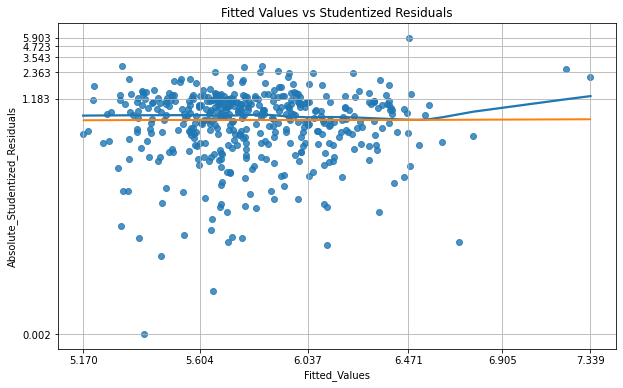

In [39]:
spread_level(fit_new, data)

Text(0, 0.5, 'Residuals')

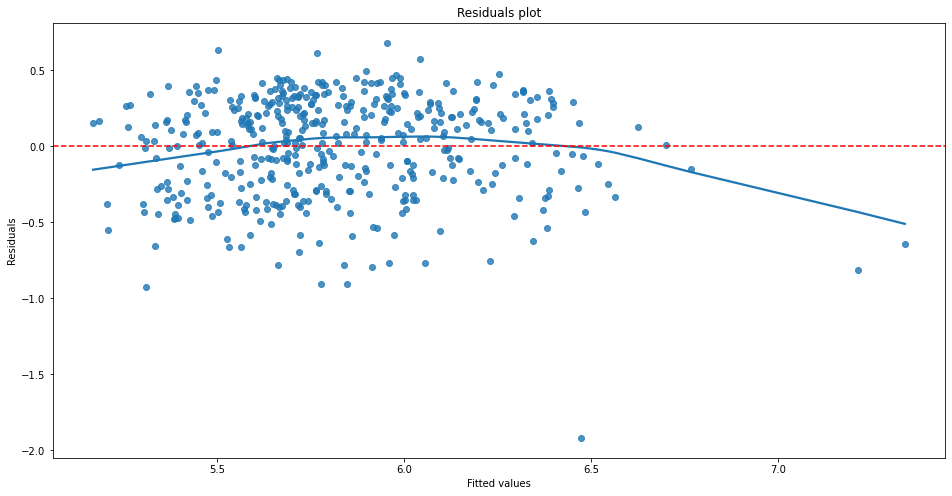

In [41]:
plt.figure(figsize = (16, 8))
plt.title('Residuals plot')
sns.regplot(fit_new.fittedvalues, fit_new.resid, lowess = True)
plt.axhline(0, linestyle = '--', color = "red")
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

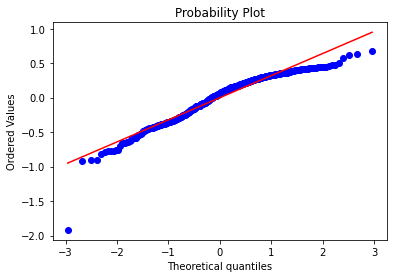

In [42]:
stats.probplot(fit_new.resid, dist = "norm", plot = plt)
plt.show()

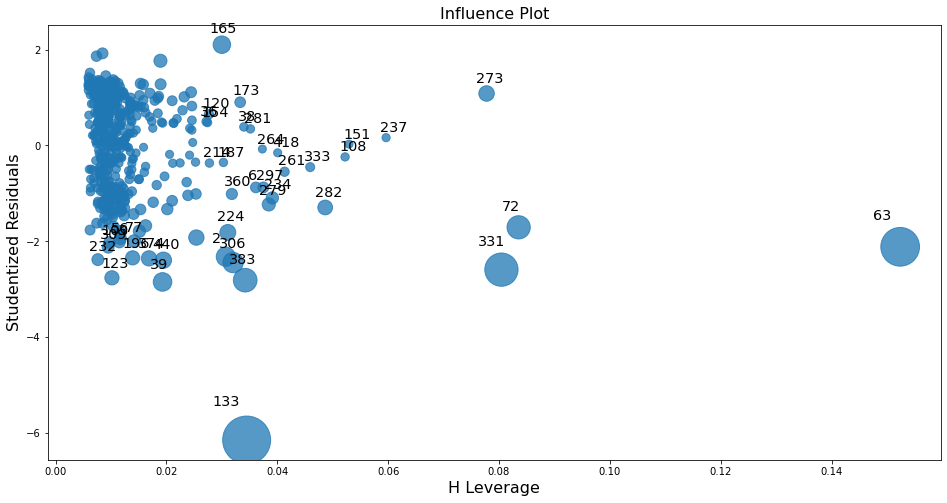

In [43]:
fig, ax = plt.subplots(figsize = (16, 8))
fig = sm.graphics.influence_plot(fit_new, ax = ax, criterion = "cooks")

In [44]:
dffits, threshold = fit_new.get_influence().dffits
data_new = data.copy()
data_new["dffits"] = dffits
data_new = data_new[data_new["dffits"] < threshold].reset_index(drop = True)
data_new = data_new[data_new["dffits"] > (-threshold)].reset_index(drop = True)

Text(0, 0.5, 'Residuals')

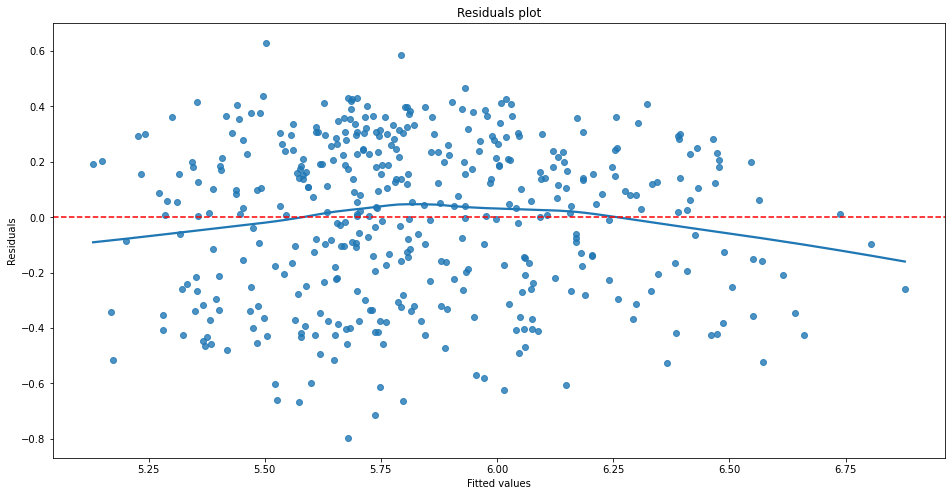

In [45]:
fit_final = smf.ols('ltotalPrice ~ square + communityAverage + elevator + subway + I(square * communityAverage)', data_new).fit()
plt.figure(figsize = (16, 8))
plt.title('Residuals plot')
sns.regplot(fit_final.fittedvalues, fit_final.resid, lowess = True)
plt.axhline(0, linestyle = '--', color = "red")
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

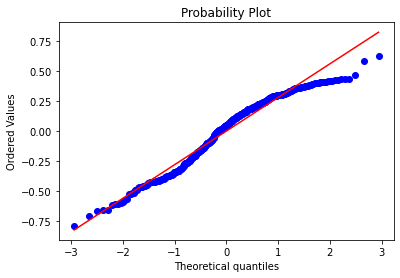

In [46]:
stats.probplot(fit_final.resid, dist = "norm", plot = plt)
plt.show()

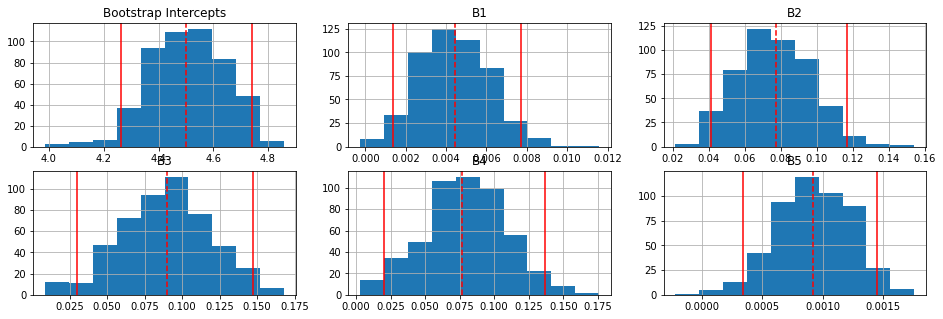

In [47]:
coefs = pd.DataFrame(columns = ["B0","B1","B2","B3","B4","B5"])
for i in range(500):
    sample = data_new.sample(data_new.shape[0] ,replace = True)
    results_sample = smf.ols('ltotalPrice ~ square + communityAverage + elevator + subway + I(square * communityAverage)', sample).fit()
    b0, b1, b2, b3, b4, b5 = results_sample.params
    coefs = coefs.append({"B0":b0, "B1":b1,"B2":b2,"B3":b3,"B4":b4,"B5":b5}, ignore_index = True)
b0_u, b1_u, b2_u, b3_u, b4_u, b5_u = coefs.quantile(.975)
b0_l, b1_l, b2_l, b3_l, b4_l, b5_l = coefs.quantile(.025)
fig, ax = plt.subplots(2, 3,figsize=(16,5))
plt.subplot(2, 3, 1)
coefs.B0.hist()
plt.title("Bootstrap Intercepts")
plt.axvline(b0_u, color = "red")
plt.axvline(b0_l, color = "red")
plt.axvline(fit_final.params[0], color = 'red', linestyle = '--')
plt.subplot(2, 3, 2)
coefs.B1.hist()
plt.title("B1")
plt.axvline(b1_u, color = "red")
plt.axvline(b1_l, color = "red")
plt.axvline(fit_final.params[1], color = 'red', linestyle = '--')
plt.subplot(2, 3, 3)
coefs.B2.hist()
plt.title("B2")
plt.axvline(b2_u, color = "red")
plt.axvline(b2_l, color = "red")
plt.axvline(fit_final.params[2], color = 'red', linestyle = '--')
plt.subplot(2, 3, 4)
coefs.B3.hist()
plt.title("B3")
plt.axvline(b3_u, color = "red")
plt.axvline(b3_l, color = "red")
plt.axvline(fit_final.params[3], color = 'red', linestyle = '--')
plt.subplot(2, 3, 5)
coefs.B4.hist()
plt.title("B4")
plt.axvline(b4_u, color = "red")
plt.axvline(b4_l, color = "red")
plt.axvline(fit_final.params[4], color = 'red', linestyle = '--')
plt.subplot(2, 3, 6)
coefs.B5.hist()
plt.title("B5")
plt.axvline(b5_u, color = "red")
plt.axvline(b5_l, color = "red")
plt.axvline(fit_final.params[5], color = 'red', linestyle = '--')

In [50]:
data_new["interaction"] = data_new["square"] * data_new["communityAverage"]
x = data_new[["square", "communityAverage", "elevator", "subway", "interaction"]]
y = data_new[["ltotalPrice"]]
regr = LinearRegression()
scores = cross_val_score(regr, x, y, cv=5, scoring='neg_mean_squared_error')
print('Mean of 5-Fold CV MSE Scores:', -scores.mean())

Mean of 5-Fold CV MSE Scores: 0.0827116033393562


In [51]:
model = regr.fit(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.25021428849463045
MSE: 0.08729054862914734
RMSE: 0.2954497395990515


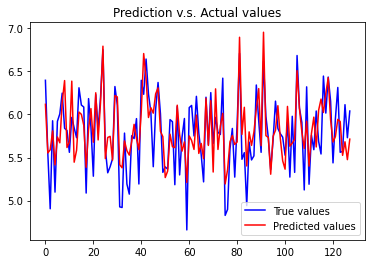

In [52]:
ys = pd.DataFrame()
ys["y_test"] = y_test["ltotalPrice"].reset_index(drop = True)
ys["y_pred"] = y_pred
fig, ax = plt.subplots()
ax.plot(ys.index, ys["y_test"], "b-", label = "True values")
ax.plot(ys.index, ys["y_pred"], "r", label = "Predicted values")
ax.legend(loc = "best")
plt.title("Prediction v.s. Actual values")
plt.show()

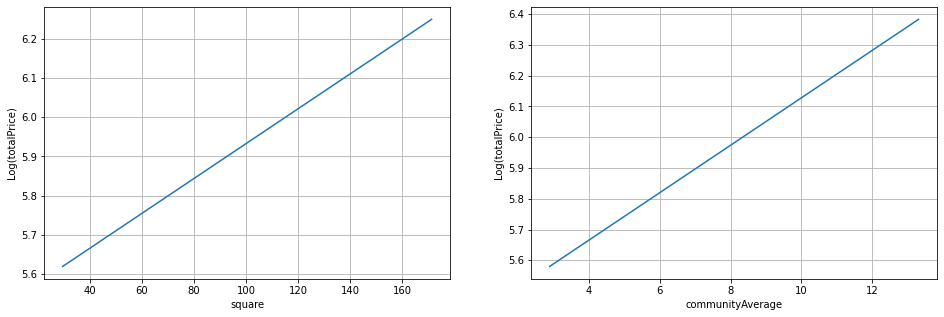

In [53]:
xsquare = np.linspace(data_new.square.min(),data_new.square.max(), 50)
xcA = np.linspace(data_new.communityAverage.min(),data_new.communityAverage.max(), 50)
xin = np.linspace(data_new.interaction.min(),data_new.interaction.max(), 50)
meansquare = data_new.square.mean()
meancA = data_new.communityAverage.mean()
meane = data_new.elevator.mean()
means = data_new.subway.mean()
meanin=data_new.interaction.mean()
fig,ax=plt.subplots(1,2,figsize=(16,5))
plt.subplot(1,2,1)
y = fit_final.params[0] + fit_final.params[1]*xsquare +fit_final.params[2]*meancA +fit_final.params[3]*meane+fit_final.params[4]*means+fit_final.params[5]*meanin
plt.plot(xsquare, y)
plt.xlabel("square")
plt.ylabel("Log(totalPrice)")
plt.grid()
plt.subplot(1,2,2)
y = fit_final.params[0] + fit_final.params[1]*meansquare+fit_final.params[2]*xcA +fit_final.params[3]*meane+fit_final.params[4]*means+fit_final.params[5]*meanin
plt.plot(xcA, y)
plt.xlabel("communityAverage")
plt.ylabel("Log(totalPrice)")
plt.grid()

In [54]:
fit_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ltotalPrice   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     114.1
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           6.33e-76
Time:                        15:33:06   Log-Likelihood:                -68.764
No. Observations:                 425   AIC:                             149.5
Df Residuals:                     419   BIC:                             173.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        4.5020      0.145     31.037      0.000       4.217       4.787
square                           0.0044      0.002      2.442      0.015       0.001       0.008
communityAverage                 0.0771      0.023      3.379      0.001       0.032       0.122
elevator                         0.0899      0.029      3.053      0.002       0.032       0.148
subway                           0.0770      0.030      2.587      0.010       0.018       0.135
I(square * communityAverage)     0.0009      0.000      2.829      0.005       0.000       0.002
==============================================================================
Omnibus:                       43.514   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.062
Skew:                          -0.387   Prob(JB):                     1.62e-05
Kurtosis:                       2.195   Cond. No.                     5.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
data_new.communityAverage.mean()*0.0009+0.0044

0.009959143505882352

In [58]:
data_new.square.mean()*0.0009+0.0771

0.1469298564705883

From the Component-Plus-Residual Plots, all of our predictors are basically linear with y. Consistent with linearity test, there is no need for transformation. However, we find that many predictors are insignificant while the r-squared is quite large. We think there might be multicollinearity. After getting the VIF for each predictor, there is no multicollinearity and then we think the insignificant predictors must be irrelevant variables. We dropped them and keep square, communityAverage, elevator and subway. 

In this model, still linearity and no multicollinearity, Besides, R-squared and significance doesn’t change too much and AIC and BIC even become smaller which proves that we are right (Dropped predictors are irrelevant). Then we use BP test, White test and Goldfeld-Quandt to test heteroskedasticity, it turns out that the model is homoskedasticity since we fail to reject the null of homoskedasticity. Drawing the spread-level plots of residuals, we can see that the variance of residuals is constant. Even though there is no need to eliminate heteroskedasticity in this case, we still compare the original model with the HCE and FWLS models. Since the original model has the same significance level for predictors, the similar r-squared and smaller AIC and BIC, we decide to use the original model. 

To test misspecification, we use RESET method and reject the null of not adding nonlinear expressions. Testing the quadratic terms one by one, we find that the interaction term of square*communityAverage is significant and adding it won’t change the significance, the fit of regression and we even get a smaller AIC and BIC. There is still no heteroskedasticity. The residuals are randomly distributed around 0 with non-constant variance when looking at Residuals Plot. But they do normally distributed when looking at q-q plot. There are some outliers and high leverage observations looking at the Cook’s distance Plot. Then we exclude the unusual observations using DIFFTIS method. After that, the residuals plot and q-q plot look better. 

Then we showed the histogram of the bootstrapped estimates. Our estimates are robust since the estimates lie in the confidence interval. The Mean of 5-Fold cross-validation MSE Scores is  0.0827116033393562 which means our model performs well. The out of sample performance is good as well (MAE=0.25,MSE=0.09, RMSE=0.30). From the marginal effect plots, the marginal effect of square is β1+β5*communityAverage, the marginal effect of communityAverage is β2+β5*square.

Our final model is 

log(totalPrice) = β0 + β1square + β2communityAverage + β3elevator + β4subway + β5square*communityAverage

Holding others constant, the 1 square meter increase will increase total price of housing by 0.10% in average. Holding others constant, the ￥10,000 increase of average housing price in the community will increase total price of housing by 14.69% in average. Holding others equal, the price of a house with elevators will increase 8.99% compared with that without elevators. Holding others equal, the price of a house near subways will increase 7.7% compared with that far from subways. 